[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy Score: 0.8046448087431693
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1889
           1       0.69      0.49      0.58       580
           2       0.80      0.63      0.70       459

    accuracy                           0.80      2928
   macro avg       0.77      0.69      0.72      2928
weighted avg       0.80      0.80      0.79      2928



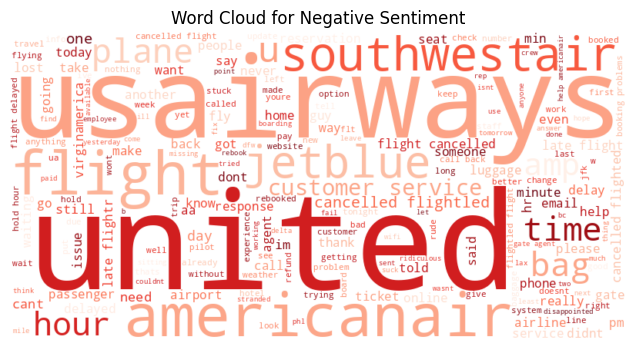

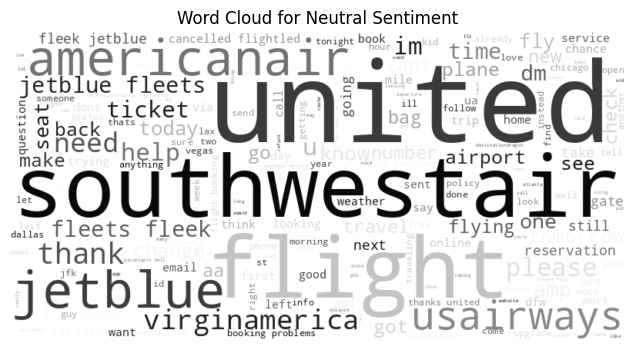

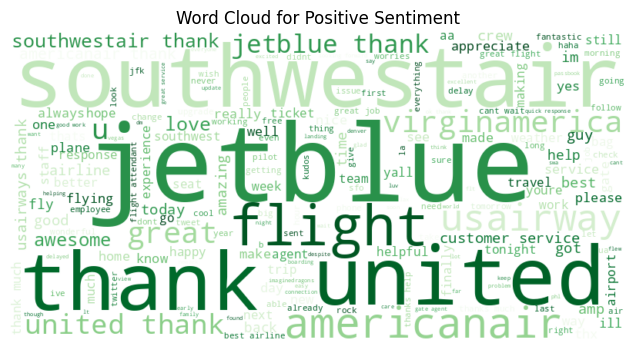

Predicted Sentiment: Positive


In [ ]:
# Step 2: Import Libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Step 3: Load Dataset
df = pd.read_csv("Tweets.csv")
df = df[['text', 'airline_sentiment']]  # Keep only required columns
df = df.dropna()  # Remove missing values

# Step 4: Data Cleaning Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['clean_text'] = df['text'].apply(clean_text)

# Step 5: Convert Sentiments to Numeric Labels
df['sentiment_label'] = df['airline_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

# Step 6: Split Data for Training
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['sentiment_label'], test_size=0.2, random_state=42)

# Step 7: Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 8: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Step 9: Model Evaluation
y_pred = model.predict(X_test_tfidf)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 10: Word Cloud for Each Sentiment
for sentiment, cmap in zip(['negative', 'neutral', 'positive'], ['Reds', 'Greys', 'Greens']):
    text = " ".join(df[df['airline_sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=cmap).generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment.capitalize()} Sentiment")
    plt.show()


# Step 11: Predict Sentiment of a New Tweet
def predict_sentiment(new_tweet):
    cleaned_tweet = clean_text(new_tweet)
    transformed_tweet = vectorizer.transform([cleaned_tweet])
    prediction = model.predict(transformed_tweet)[0]
    sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return sentiment_map[prediction]

# Example
new_tweet = "I love the airline service, it was fantastic!"
print("Predicted Sentiment:", predict_sentiment(new_tweet))


             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

<ipython-input-1-79a874fecf44>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df, palette='coolwarm')


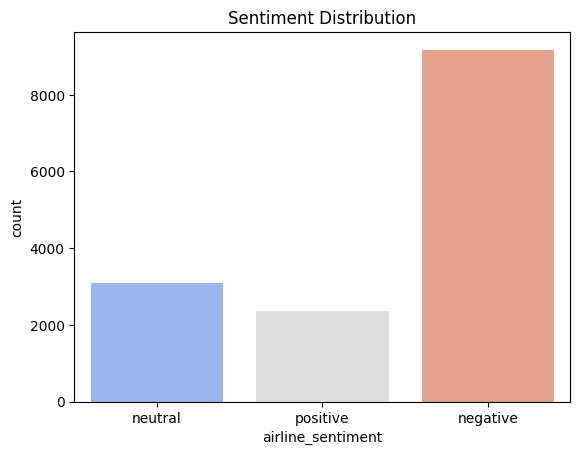

Sample Predictions: [-1 -1 -1]


In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("Tweets.csv")
print(df.head())

# Select relevant columns
df = df[['text', 'airline_sentiment']]
df.dropna(inplace=True)

# Encode sentiment labels
df['label'] = df['airline_sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Text cleaning function
def preprocess_text(text):
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)  # Remove hashtags
    text = re.sub(r'[^a-zA-Z ]', '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase
    return text

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naïve Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Sentiment distribution visualization
sns.countplot(x='airline_sentiment', data=df, palette='coolwarm')
plt.title("Sentiment Distribution")
plt.show()

# Test on sample tweets
sample_tweets = ["I love flying with this airline!", "Worst service ever.", "The flight was okay, nothing special."]
sample_tfidf = vectorizer.transform(sample_tweets)
sample_preds = model.predict(sample_tfidf)
print("Sample Predictions:", sample_preds)
